In The Name of Allah

Group3

### Loading Data

In [1]:
# train data
!gdown --id 1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX
From (redirected): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX&confirm=t&uuid=8e120d42-d19a-4f51-9d92-f48a041ed363
To: /content/car_img-test.zip
100% 2.51G/2.51G [00:40<00:00, 61.8MB/s]


In [20]:
!unzip car_img-test.zip

Archive:  car_img-test.zip
  inflating: test/day_00010.jpg      
replace test/day_00010.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: test/day_00019.jpg      
replace test/day_00019.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: test/day_00026.jpg      
  inflating: test/day_00027.jpg      
  inflating: test/day_00029.jpg      
  inflating: test/day_00038.jpg      
  inflating: test/day_00042.jpg      
  inflating: test/day_00050.jpg      
  inflating: test/day_00055.jpg      
  inflating: test/day_00056.jpg      
  inflating: test/day_00059.jpg      
  inflating: test/day_00069.jpg      
  inflating: test/day_00075.jpg      
  inflating: test/day_00083.jpg      
  inflating: test/day_00100.jpg      
  inflating: test/day_00102.jpg      
  inflating: test/day_00103.jpg      
  inflating: test/day_00104.jpg      
  inflating: test/day_00105.jpg      
  inflating: test/day_00109.jpg      
  inflating: test/day_00114.jpg      
  inflating: test/day_00116.jpg      
 

In [3]:
# https://drive.google.com/file/d/1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT/view
!gdown --id 1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT
From (redirected): https://drive.google.com/uc?id=1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT&confirm=t&uuid=7acb2186-674a-48c4-8443-c584a63a891a
To: /content/car_img-validation.zip
100% 1.27G/1.27G [00:14<00:00, 86.8MB/s]


In [21]:
!unzip car_img-validation.zip

Archive:  car_img-validation.zip
  inflating: validation/day_00004.jpg  
replace validation/day_00004.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: validation/day_00011.jpg  
  inflating: validation/day_00018.jpg  
  inflating: validation/day_00024.jpg  
  inflating: validation/day_00033.jpg  
  inflating: validation/day_00036.jpg  
  inflating: validation/day_00041.jpg  
  inflating: validation/day_00043.jpg  
  inflating: validation/day_00045.jpg  
  inflating: validation/day_00047.jpg  
  inflating: validation/day_00049.jpg  
  inflating: validation/day_00053.jpg  
  inflating: validation/day_00054.jpg  
  inflating: validation/day_00058.jpg  
  inflating: validation/day_00065.jpg  
  inflating: validation/day_00070.jpg  
  inflating: validation/day_00074.jpg  
  inflating: validation/day_00090.jpg  
  inflating: validation/day_00092.jpg  
  inflating: validation/day_00101.jpg  
  inflating: validation/day_00146.jpg  
  inflating: validation/day_00153.jpg  
  inflating: 

In [5]:
# empty dataset structure filling with data with yolo format
# https://drive.google.com/file/d/15RQuI2lQdD5MzrV7qp4Rf2-CianJ6elL/view?usp=sharing
!gdown --id 15RQuI2lQdD5MzrV7qp4Rf2-CianJ6elL

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15RQuI2lQdD5MzrV7qp4Rf2-CianJ6elL
To: /content/dataset.zip
100% 1.50k/1.50k [00:00<00:00, 4.60MB/s]


In [6]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/dataset.yaml    
   creating: dataset/images/
   creating: dataset/images/train/
   creating: dataset/images/val/
   creating: dataset/labels/
   creating: dataset/labels/train/
   creating: dataset/labels/val/


### Utility

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.7 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
from transformers import MobileViTFeatureExtractor, MobileViTForSemanticSegmentation
from PIL import Image
import requests
from ultralytics import YOLO, checks
import cv2
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
def process_xml(xml_file):
    """
    Parses the XML file and calls print_xml on the root element.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return root

def print_xml(element, indent=0):
    print(' ' * indent + f"{element.tag}: {element.text.strip() if element.text else ''}")
    for child in element:
        print_xml(child, indent + 2)

def print_element(element, indent=0):
    print(' ' * indent + f"{element.tag}: {element.text.strip() if element.text else ''}")
    for child in element:
        print_xml(child, indent + 2)

def extract_plate(xml_file, target_name="کل ناحیه پلاک"):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Iterate over all 'object' elements
    for obj in root.findall("object"):
        name = obj.find("name").text

        # Check if the object name matches the target
        if name == target_name:
            # Extract and return the bounding box coordinates as a dictionary
            bnd_box = {
                "xmin": int(obj.find("bndbox/xmin").text),
                "ymin": int(obj.find("bndbox/ymin").text),
                "xmax": int(obj.find("bndbox/xmax").text),
                "ymax": int(obj.find("bndbox/ymax").text)
            }
            return bnd_box

    # If no match found, return None
    return None

def draw_image(car_img, plate_xml=None, plate=None):
  img = mpimg.imread(car_img)  # Replace with your image file path
  fig, ax = plt.subplots()
  ax.imshow(img)

  if(plate_xml):
    coords = extract_plate(plate_xml)
    width = coords['xmax'] - coords['xmin']
    height = coords['ymax'] - coords['ymin']
    rect = patches.Rectangle((coords['xmin'], coords['ymin']), width, height,
                         linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

  if(plate):
    width2 = plate['xmax'] - plate['xmin']
    height2 = plate['ymax'] - plate['ymin']
    rect2 = patches.Rectangle((plate['xmin'], plate['ymin']), width2, height2,
                         linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect2)

  plt.axis('off')  # Optional: Hide axes
  plt.show()

def draw_image2(car_img, plate=None):
  img = mpimg.imread(car_img)  # Replace with your image file path
  fig, ax = plt.subplots()
  ax.imshow(img)

  if(plate):
    width = plate['xmax'] - plate['xmin']
    height = plate['ymax'] - plate['ymin']
    rect = patches.Rectangle((plate['xmin'], plate['ymin']), width, height,
                         linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

  plt.axis('off')  # Optional: Hide axes
  plt.show()

def prepare_image(car_img):
  # do some stuff with car_img: resize
  return car_img

def detect_plate(img_dir, model=None):
  # img_raw = mpimg.imread(img_dir)  # Replace with your image file path
  # img_standard = prepare_image(img_raw)
  img_standard = mpimg.imread(img_dir)

  if(model == None):
    model = YOLO("yolov8n.pt")
  # Perform inference
  results = model(img_standard)

  # Display bounding boxes and coordinates
  for result in results:
      for box in result.boxes:
          # Extract coordinates of the bounding box
          xmin, ymin, xmax, ymax = box.xyxy[0]  # YOLO outputs in xyxy format

          # Convert coordinates to integers
          xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

          # Draw bounding box on the image
          image_copy = img_standard.copy()
          # cv2.rectangle(image_copy, (x1, y1), (x2, y2), color, thickness)

          cv2.rectangle(image_copy, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

          # Print coordinates
          print(f"Plate coordinates: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

  plate = {
      'xmin': xmin,
      'xmax': xmax,
      'ymin': ymin,
      'ymax': ymax
  }

  # if there is a model, use it to detet plate
  return plate

  import os
import xml.etree.ElementTree as ET



def convert_xml_to_yolo_format(xml_folder, output_folder):
  '''
  script for converting xml to text files
  '''
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for xml_file in os.listdir(xml_folder):
      if xml_file.endswith('.xml'):
          tree = ET.parse(os.path.join(xml_folder, xml_file))
          root = tree.getroot()

          # Assuming the image filename is in the XML file
          image_filename = root.find('filename').text
          yolo_labels = []

          for obj in root.findall('object'):
              name = obj.find('name').text
              if name == "کل ناحیه پلاک":  # Adjust as needed for your specific class
                  # Get bounding box coordinates
                  bndbox = obj.find('bndbox')
                  # Convert to float first, then to int
                  xmin = int(float(bndbox.find('xmin').text))
                  ymin = int(float(bndbox.find('ymin').text))
                  xmax = int(float(bndbox.find('xmax').text))
                  ymax = int(float(bndbox.find('ymax').text))

                  # YOLO format: class_id x_center y_center width height
                  class_id = 0  # Change to the appropriate class ID for your dataset
                  yolo_labels.append(f"{class_id} {xmax} {ymax} {xmin} {ymin}")

          # Save YOLO labels to a .txt file
          yolo_label_file = os.path.join(output_folder, f"{os.path.splitext(image_filename)[0]}.txt")
          with open(yolo_label_file, 'w') as f:
              f.write("\n".join(yolo_labels))



def move_jpg_files(src_dir, dest_dir, verbose=True):
    """
    Moves .jpg files from the source directory to the destination directory,
    excluding files with 'night' in their filenames.

    Args:
    - src_dir (str): The source directory containing the files to move.
    - dest_dir (str): The destination directory where files will be moved.
    - verbose (bool): If True, prints the names of moved and skipped files.
    """
    # Create destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Iterate over files in the source directory
    for filename in os.listdir(src_dir):
        # Check if the file is a .jpg and does not contain 'night'
        if filename.endswith('.jpg') and 'night' not in filename:

            # Remove "day_" from the filename if it exists
            new_filename = filename.replace("day_", "")

            # Construct full file path
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, new_filename)

            # Move the file
            shutil.move(src_file, dest_file)
            if verbose:
                print(f'Moved: {filename} -> {new_filename}')
        else:
            if verbose:
                print(f'Skipped: {filename}')



### Explore data

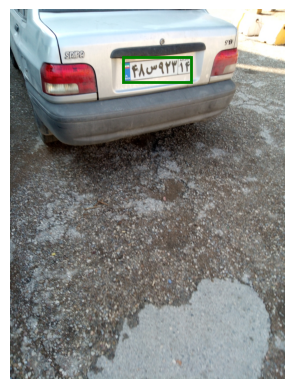

In [10]:
draw_image('test/day_08471.jpg', 'test/day_08471.xml')

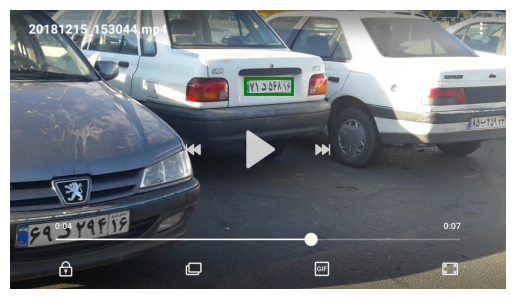

In [11]:
draw_image('test/day_14876.jpg', 'test/day_14876.xml')


### Model

In [ ]:
# pipeline
'''
load images
preprocess images
load model
detect plates
predict plates
'''


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.2MB/s]



0: 640x480 1 car, 424.6ms
Speed: 37.3ms preprocess, 424.6ms inference, 35.9ms postprocess per image at shape (1, 3, 640, 480)
Plate coordinates: xmin=6, ymin=1, xmax=792, ymax=478


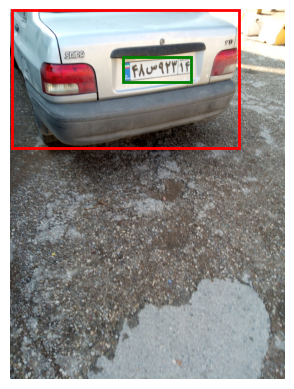

In [12]:
plate = detect_plate('test/day_08471.jpg')
draw_image('test/day_08471.jpg', 'test/day_08471.xml',plate)


0: 384x640 2 cars, 3 trucks, 341.0ms
Speed: 3.3ms preprocess, 341.0ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)
Plate coordinates: xmin=1, ymin=23, xmax=497, ymax=597
Plate coordinates: xmin=638, ymin=3, xmax=1279, ymax=406
Plate coordinates: xmin=637, ymin=3, xmax=1279, ymax=408
Plate coordinates: xmin=170, ymin=1, xmax=828, ymax=377
Plate coordinates: xmin=185, ymin=3, xmax=1279, ymax=409


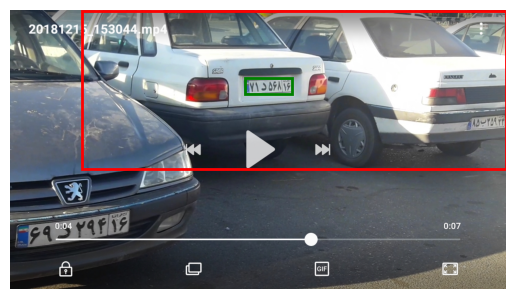

In [13]:
plate = detect_plate('test/day_14876.jpg')
draw_image('test/day_14876.jpg', 'test/day_14876.xml',plate)

### g3_model based on yolo

In [14]:
# convert train xml files to yolo format
train_xml = "/content/test"
train_labels = "/content/dataset/labels/train"
convert_xml_to_yolo_format(train_xml, train_labels)

In [15]:
# convert val xml files to yolo format
val_xml = "/content/validation"
val_labels = "/content/dataset/labels/val"
convert_xml_to_yolo_format(val_xml, val_labels)

In [16]:
# move train imgs to dataset, filtering night imgs
source_dir = '/content/test'
dest_dir = '/content/dataset/images/train'
move_jpg_files(source_dir, dest_dir, verbose=False)  # Set verbose to False to disable print statements


In [17]:
# move val imgs to dataset, filtering night imgs
source_dir = '/content/validation'
dest_dir = '/content/dataset/images/val'
move_jpg_files(source_dir, dest_dir, verbose=False)  # Set verbose to False to disable print statements


In [18]:
# Load a pretrained YOLO model (e.g., YOLOv5 or YOLOv8)
g3_model_v1 = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt', 'yolov8m.pt', etc.

# Modify the model (if needed)
# For example, change the number of output classes
# g3_model_v1.model[-1].nc = 1  # Set to the number of classes in your dataset

# Set the training parameters
g3_model_v1.train(
    data='/content/dataset/dataset.yaml',  # Update to your dataset path
    epochs=10,  # Number of training epochs, TODO: increase to 100 later
    imgsz=640,  # Image size
    batch=16,  # Batch size
    name='g3_model',  # Name of the model
    save=True,  # Save the model after training
)


Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=g3_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 13.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/labels/train... 205 images, 3146 backgrounds, 205 corrupt: 100%|██████████| 3351/3351 [00:03<00:00, 849.26it/s] 

train: WARNING ⚠️ /content/dataset/images/train/10020.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        719         447         591         409]
train: WARNING ⚠️ /content/dataset/images/train/10034.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        807         561         390         390]
train: WARNING ⚠️ /content/dataset/images/train/10044.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        706         502         493         433]
train: WARNING ⚠️ /content/dataset/images/train/10049.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        829         536         532         465]
train: WARNING ⚠️ /content/dataset/images/train/10090.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        809         382         512         313]
train: WARNING ⚠️ /content/dataset/images/train/10108.jpg: ignoring corrupt image/lab

train: New cache created: /content/dataset/labels/train.cache
WARNING ⚠️ No labels found in /content/dataset/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 66 images, 1642 backgrounds, 66 corrupt: 100%|██████████| 1708/1708 [00:00<00:00, 2663.67it/s]

val: WARNING ⚠️ /content/dataset/images/val/10065.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        456         837         222         709]
val: WARNING ⚠️ /content/dataset/images/val/10304.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        673         371         459         215]
val: WARNING ⚠️ /content/dataset/images/val/10320.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [         99         465           9         437        1221         492        1150         470         739         424         694         412]
val: WARNING ⚠️ /content/dataset/images/val/10378.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        798         703         470         553]
val: WARNING ⚠️ /content/dataset/images/val/10390.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        888         493         414         344]
val: WARN

Plotting labels to runs/detect/g3_model/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/g3_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G          0      118.6          0          0        640:   9%|▊         | 17/197 [04:45<50:25, 16.81s/it]


KeyboardInterrupt: 

In [22]:
g3_model_v2 = YOLO('/content/plate_model_g3.pt')

plate = detect_plate('test/day_08471.jpg', g3_model_v2)
draw_image('test/day_08471.jpg', 'test/day_08471.xml',plate)

UnpicklingError: invalid load key, '\x0a'.

### Indian Model :)

In [23]:
# dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bdFsYHcb9P7HbtDgxGOT")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Detector-2 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 5039.27it/s]


In [25]:
# train indian model

indian_model = YOLO('yolov8n.pt')

indian_model.train(
    data='/content/License-Plate-Detector-2/data.yaml',  # Update to your dataset path
    epochs=10,
    imgsz=640,
    batch=16,
    name='indian_model',
    save=True,
)



Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Detector-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=indian_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /content/License-Plate-Detector-2/train/labels... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<00:00, 1678.33it/s]

train: New cache created: /content/License-Plate-Detector-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/License-Plate-Detector-2/valid/labels... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<00:00, 1245.76it/s]

val: New cache created: /content/License-Plate-Detector-2/valid/labels.cache
Plotting labels to runs/detect/indian_model2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/indian_model2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.023      3.147      1.153          5        640: 100%|██████████| 18/18 [04:38<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.22s/it]

                   all         81         81    0.00333          1      0.863      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9293      2.051      1.051          5        640: 100%|██████████| 18/18 [04:29<00:00, 14.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.37s/it]

                   all         81         81          1     0.0556      0.807      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9463      1.876      1.029          5        640: 100%|██████████| 18/18 [04:27<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:32<00:00, 10.78s/it]

                   all         81         81          1      0.449      0.708      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9186      1.709      1.021          5        640: 100%|██████████| 18/18 [04:27<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:32<00:00, 10.81s/it]

                   all         81         81      0.891      0.778      0.911       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9158      1.622      1.038          5        640: 100%|██████████| 18/18 [04:33<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.43s/it]

                   all         81         81      0.746      0.605      0.733      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9022      1.568       1.03          5        640: 100%|██████████| 18/18 [04:43<00:00, 15.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:30<00:00, 10.08s/it]

                   all         81         81      0.926      0.932      0.958      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8393      1.392      1.032          5        640: 100%|██████████| 18/18 [04:39<00:00, 15.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.51s/it]

                   all         81         81       0.96      0.926      0.977      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7802      1.269     0.9802          5        640: 100%|██████████| 18/18 [04:31<00:00, 15.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.68s/it]

                   all         81         81      0.987      0.962      0.981      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7682      1.157     0.9857          5        640: 100%|██████████| 18/18 [04:29<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.01s/it]

                   all         81         81      0.952      0.971      0.982      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7187      1.135     0.9414          5        640: 100%|██████████| 18/18 [04:34<00:00, 15.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:30<00:00, 10.01s/it]

                   all         81         81      0.987      0.973      0.985      0.828



10 epochs completed in 0.850 hours.
Optimizer stripped from runs/detect/indian_model2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/indian_model2/weights/best.pt, 6.2MB

Validating runs/detect/indian_model2/weights/best.pt...
Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.19s/it]


                   all         81         81      0.987      0.973      0.985      0.828
Speed: 10.6ms preprocess, 306.2ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/indian_model2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ace5fb4f310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [27]:
result = indian_model.predict('test/day_08471.jpg')



image 1/1 /content/test/day_08471.jpg: 640x480 1 LicensePlate, 491.2ms
Speed: 7.1ms preprocess, 491.2ms inference, 17.7ms postprocess per image at shape (1, 3, 640, 480)


In [28]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'LicensePlate'}
 obb: None
 orig_img: array([[[196, 187, 160],
         [196, 187, 160],
         [196, 189, 162],
         ...,
         [197, 236, 250],
         [199, 238, 252],
         [203, 239, 255]],
 
        [[200, 191, 164],
         [199, 190, 163],
         [196, 189, 162],
         ...,
         [198, 237, 251],
         [201, 237, 253],
         [202, 238, 254]],
 
        [[202, 194, 165],
         [204, 196, 167],
         [202, 194, 165],
         ...,
         [199, 234, 248],
         [200, 234, 250],
         [202, 236, 252]],
 
        ...,
 
        [[149, 131, 100],
         [156, 137, 104],
         [158, 139, 102],
         ...,
         [ 95, 100,  98],
         [100, 105, 103],
         [106, 109, 107]],
 
        [[155, 136, 101],
         [162, 144, 107],
         [166, 147, 109],
         ...,
         [ 8

In [31]:
# Load an image
image_test = cv2.imread("test/day_08471.jpg")

# Perform inference
results = indian_model(image_test)

# Display bounding boxes
for result in results:
    for box in result.boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0]
        xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

        # Draw bounding box
        cv2.rectangle(image_test, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        print(f"Detected plate coordinates: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

# Show the image with bounding boxes
cv2.imshow("Detected Plates", image_test)



0: 640x480 1 LicensePlate, 666.3ms
Speed: 8.2ms preprocess, 666.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Detected plate coordinates: xmin=386, ymin=152, xmax=633, ymax=253


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [32]:
import cv2

def save_annotated_image(image_path, predictions, output_path):
    """
    Draws bounding boxes on the image and saves it.

    Args:
    - image_path (str): Path to the original image.
    - predictions: List of bounding boxes with format [class_id, confidence, x, y, width, height].
    - output_path (str): Path to save the annotated image.
    """
    image = cv2.imread(image_path)

    for pred in predictions:
        class_id, confidence, x, y, width, height = pred

        # Convert normalized YOLO format (center x, center y, width, height) to (xmin, ymin, xmax, ymax)
        xmin = int((x - width / 2) * image.shape[1])
        ymin = int((y - height / 2) * image.shape[0])
        xmax = int((x + width / 2) * image.shape[1])
        ymax = int((y + height / 2) * image.shape[0])

        # Draw rectangle and label on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        label = f"{class_id}: {confidence:.2f}"
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save annotated image
    cv2.imwrite(output_path, image)
    print(f"Annotated image saved to {output_path}")

# Example usage
result = indian_model.predict('test/day_08471.jpg')
save_annotated_image('test/day_08471.jpg', result, 'predictions/day_08471_annotated.jpg')



image 1/1 /content/test/day_08471.jpg: 640x480 1 LicensePlate, 177.1ms
Speed: 4.8ms preprocess, 177.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


ValueError: not enough values to unpack (expected 6, got 1)

In [39]:
import cv2

def save_annotated_image(image_path, predictions, output_path):
    """
    Draws bounding boxes on the image and saves it.

    Args:
    - image_path (str): Path to the original image.
    - predictions: Results from the model's prediction.
    - output_path (str): Path to save the annotated image.
    """
    image = cv2.imread(image_path)

    # Accessing bounding box information from predictions
    for *xyxy, conf, cls in predictions[0].boxes.data:
        xmin, ymin, xmax, ymax = map(int, xyxy)

        # Draw rectangle and label on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        label = f"{int(cls)}: {conf:.2f}"  # Convert class ID to integer
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # # Save annotated image
    # cv2.imwrite(output_path, image)
    # print(f"Annotated image saved to {output_path}")

    success = cv2.imwrite(output_path, image)
    if success:
        print(f"Annotated image saved to {output_path}")
    else:
        print(f"Error: Unable to save image at {output_path}")

# Example usage
result = indian_model.predict('test/day_08471.jpg')
save_annotated_image('test/day_08471.jpg', result, '/content/runs/predictions/pred2/day_08471_annotated.jpg')


image 1/1 /content/test/day_08471.jpg: 640x480 1 LicensePlate, 657.4ms
Speed: 18.1ms preprocess, 657.4ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 480)
Error: Unable to save image at /content/runs/predictions/pred2/day_08471_annotated.jpg


In [42]:
# test/day_14876.jpg
result = indian_model.predict('/content/dataset/images/train/00019.jpg')
save_annotated_image('/content/dataset/images/train/00019.jpg', result, '/content/runs/predictions/test/day_14876_annotated.jpg')


image 1/1 /content/dataset/images/train/00019.jpg: 640x480 1 LicensePlate, 215.1ms
Speed: 13.7ms preprocess, 215.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Error: Unable to save image at /content/runs/predictions/test/day_14876_annotated.jpg
